In [8]:
%pip install split-folders

  Using cached split_folders-0.5.1-py3-none-any.whl.metadata (6.2 kB)
Using cached split_folders-0.5.1-py3-none-any.whl (8.4 kB)
Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from keras.layers import Conv2D,Flatten,MaxPool2D,Dense
from keras.models import Sequential

from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix

import os
import splitfolders

from keras.preprocessing.image import ImageDataGenerator

In [22]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "C:/Users/rawat/kaggle datset/kidney disease/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone",
    shuffle=True,
    batch_size=32,
    image_size=(224, 224),
)

labels = dataset.class_names
labels

Found 12446 files belonging to 4 classes.


['Cyst', 'Normal', 'Stone', 'Tumor']

In [8]:
path_main = "C:/Users/rawat/kaggle datset/kidney disease/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone"

In [9]:
os.listdir(path_main)

['Cyst', 'Normal', 'Stone', 'Tumor']

In [12]:
for folder in os.listdir(path_main):
    folder_path=os.path.join(path_main,folder)
    if os.path.isdir(folder_path):
        list_of_elements=os.listdir(os.path.join(path_main,folder))

        print(f"folder:{folder}")
        print(f"number of elements:{len(list_of_elements)}")
        print("*****************")

    else:
        print(f"{folder_path} is not a directory")

folder:Cyst
number of elements:3709
*****************
folder:Normal
number of elements:5077
*****************
folder:Stone
number of elements:1377
*****************
folder:Tumor
number of elements:2283
*****************


to plot images in each folder


In [13]:
def plot_imgs(item_dir,num_imgs=25):
    all_item_dirs=os.listdir(item_dir)
    item_files=[os.path.join(item_dir,file) for file in all_item_dirs][:num_imgs]

    plt.figure(figsize=(10,10))
    for idx,img_path in enumerate(item_files):
        plt.subplot(5,5,idx+1)
        img=plt.imread(img_path)
        plt.imshow(img)

    plt.tight_layout()

In [16]:
path_cyst="C:/Users/rawat/kaggle datset/kidney disease/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Cyst"
path_normal="C:/Users/rawat/kaggle datset/kidney disease/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Normal"
path_stone="C:/Users/rawat/kaggle datset/kidney disease/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Stone"
path_tumor="C:/Users/rawat/kaggle datset/kidney disease/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Tumor"

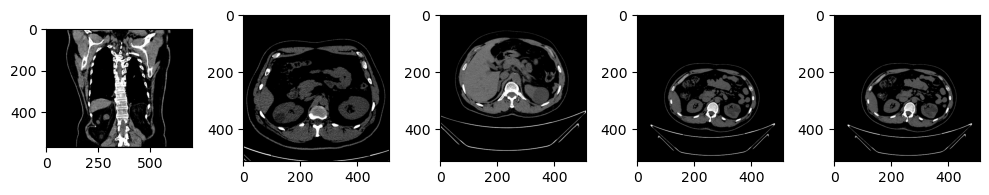

In [17]:
plot_imgs(path_cyst,5)

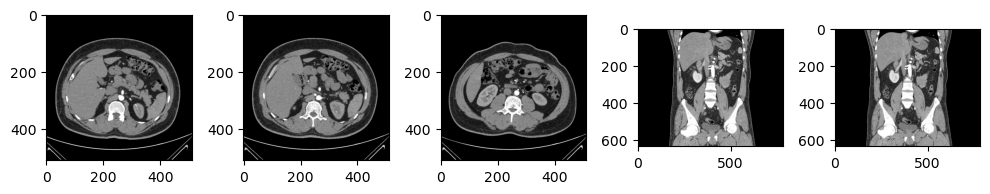

In [18]:
plot_imgs(path_normal,5)

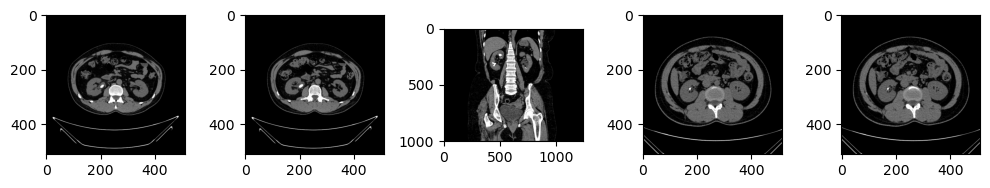

In [19]:
plot_imgs(path_stone,5)

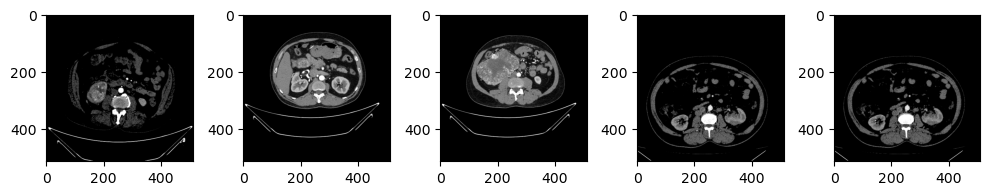

In [20]:
plot_imgs(path_tumor,5)

In [22]:
splitfolders.ratio("C:/Users/rawat/kaggle datset/kidney disease/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone",
                   output="data",
                   seed=7,
                   ratio=(0.8,0.1,0.1))

In [2]:
train_datagen=ImageDataGenerator(rescale=1./255,
                                 rotation_range=10,
                                 zoom_range=[0.5, 1.5],
                                 brightness_range=(0.3, 0.9))
valid_datagen=ImageDataGenerator(rescale=1./255,
                                 rotation_range=10,
                                 zoom_range=[0.5, 1.5],
                                 brightness_range=(0.3, 0.9))
test_datagen=ImageDataGenerator(rescale=1./255,
                                rotation_range=10,
                                 zoom_range=[0.5, 1.5],
                                 brightness_range=(0.3, 0.9))

In [3]:
train=train_datagen.flow_from_directory("data/train",
                                       target_size=(255,255),
                                       color_mode="rgb",
                                       class_mode="categorical",
                                       batch_size=32)

valid=valid_datagen.flow_from_directory("data/val",
                                       target_size=(255,255),
                                       color_mode="rgb",
                                       class_mode="categorical",
                                       batch_size=32)

test=test_datagen.flow_from_directory("data/test",
                                     target_size=(255,255),
                                     color_mode="rgb",
                                     class_mode="categorical",
                                     batch_size=32)

Found 9955 images belonging to 4 classes.
Found 1242 images belonging to 4 classes.
Found 1249 images belonging to 4 classes.


In [4]:
from keras.applications.vgg16 import VGG16
conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(255,255,3))

In [5]:
conv_base.summary()
conv_base.trainable = False

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 255, 255, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 255, 255, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 255, 255, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 127, 127, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 127, 127, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 127, 127, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 63, 63, 128)       0     

In [6]:
#we will made our CNN model

#3 convolution layers
from keras.layers import Dense, Flatten, Dropout # Import Dropout


model = Sequential()

model.add(conv_base)
model.add(Flatten())


model.add(Dense(64,activation='relu'))
#model.add(Dropout(0.1))
model.add(Dense(4,activation='softmax'))
#model.add(Dropout(0.1))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 64)                1605696   
                                                                 
 dense_1 (Dense)             (None, 4)                 260       
                                                                 
Total params: 16,320,644
Trainable params: 1,605,956
Non-trainable params: 14,714,688
_________________________________________________________________


In [8]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [11]:
history = model.fit(
    train,
    validation_data=valid,
    batch_size=32,
    epochs=10
)

Epoch 1/10
312/312 [==============================] - 1878s 6s/step - loss: 0.1456 - accuracy: 0.9519 - val_loss: 0.1207 - val_accuracy: 0.9589
Epoch 2/10
312/312 [==============================] - 2106s 7s/step - loss: 0.1286 - accuracy: 0.9562 - val_loss: 0.0880 - val_accuracy: 0.9726
Epoch 3/10
312/312 [==============================] - 2203s 7s/step - loss: 0.1047 - accuracy: 0.9675 - val_loss: 0.1143 - val_accuracy: 0.9630
Epoch 4/10
312/312 [==============================] - 2016s 6s/step - loss: 0.1071 - accuracy: 0.9629 - val_loss: 0.1455 - val_accuracy: 0.9477
Epoch 5/10
312/312 [==============================] - 2018s 6s/step - loss: 0.0963 - accuracy: 0.9665 - val_loss: 0.0853 - val_accuracy: 0.9742
Epoch 6/10
312/312 [==============================] - 2008s 6s/step - loss: 0.0905 - accuracy: 0.9688 - val_loss: 0.0974 - val_accuracy: 0.9710
Epoch 7/10
312/312 [==============================] - 1980s 6s/step - loss: 0.0910 - accuracy: 0.9690 - val_loss: 0.0895 - val_accuracy:

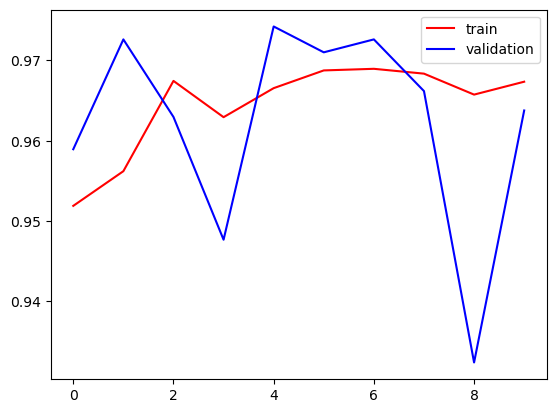

In [12]:
#case of the overfitting
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

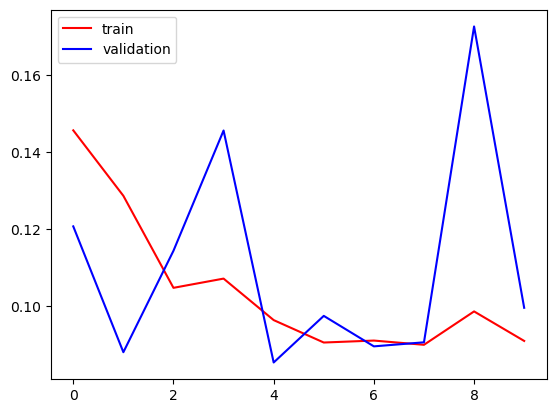

In [13]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [14]:
from tensorflow.keras.models import load_model
model.save(r'model_save/kidney_disease_classifier.h5')

In [15]:
import pickle
pickle.dump(model , open('kidney_disease_classifier' , 'wb'))

INFO:tensorflow:Assets written to: ram://3f81f74f-bb94-4a25-ab4b-729a0e7d0a07/assets


INFO:tensorflow:Assets written to: ram://3f81f74f-bb94-4a25-ab4b-729a0e7d0a07/assets


In [16]:
filename = 'kidney_disease_classifier.sav'
pickle.dump(model,open(filename, 'wb'))

INFO:tensorflow:Assets written to: ram://bf01f275-910a-45cc-9a4a-100b05443ea1/assets


INFO:tensorflow:Assets written to: ram://bf01f275-910a-45cc-9a4a-100b05443ea1/assets


In [17]:
from tensorflow.keras.models import load_model
model.save('model_save/kidney_disease_classifier_r.h5')

In [18]:
import pickle
pickle.dump(model , open('kidney_disease_classifier.pkl' , 'wb'))

INFO:tensorflow:Assets written to: ram://52b0293f-62e2-44b0-8670-80ffab049a2c/assets


INFO:tensorflow:Assets written to: ram://52b0293f-62e2-44b0-8670-80ffab049a2c/assets


In [23]:
# predict with new images
import numpy as np

img = tf.keras.preprocessing.image.load_img(
    'C:/Users/rawat/kaggle datset/kidney disease/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/CT-KIDNEY-DATASET-Normal-Cyst-Tumor-Stone/Cyst/Cyst- (1003).jpg', target_size=(255, 255)
)
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Create a batch
predictions = model.predict(img_array)
score = tf.nn.sigmoid(predictions[0])
print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(labels[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 0s 179ms/step
This image most likely belongs to Cyst with a 73.11 percent confidence.


In [29]:
import streamlit as st
import tensorflow as tf
import streamlit as st

#model=tf.keras.models.load_model('kidney_disease_classifier.h5')

class_names = ['Cyst', 'Normal', 'Stone', 'Tumor']
st.write("""
         # Flower Classification
         """
         )

file = st.file_uploader("Please upload an brain scan file", type=["jpg", "png"])

from PIL import Image, ImageOps
import numpy as np
if file is None:
    st.text("Please upload an image file")
else:
    image = Image.open(file)
    st.image(image, use_column_width=True)
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)  # Create a batch
    predictions = model.predict(img_array)
    score = tf.nn.sigmoid(predictions[0])
    print(
        "This image most likely belongs to {} with a {:.2f} percent confidence."
        .format(labels[np.argmax(score)], 100 * np.max(score))
    )